# Data Validation

In [1]:
# Read in GI01SUMO-00002 start and end CTD files
# CTD cast AT30-013 from Irminger 2 cruise

# CTD cast AR0701-010 from Irminger 3 cruise


# Download data via M2M

In [2]:
# First, import the Python libraries we will need
import requests
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from seabird.cnv import fCNV

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [3]:
# API Information
USERNAME =''            # need to add
TOKEN= ''               # need to add
API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [4]:
# Instrument Information
beginDT = '2015-08-18T00:00:01.500Z' 
endDT = '2015-08-20T00:00:01.500Z'

site = 'GI03FLMA'
node = 'RIM01'
instrument_G = '02-CTDMOG0'
instrument_H = '02-CTDMOH0'
method = 'recovered_inst'
stream = 'ctdmo_ghqr_instrument_recovered'

iid = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]

for i in iid:
    if i < 49:
        instrument = ''.join((instrument_G,str(i)))
        data_request_url ='/'.join((API_BASE_URL,site,node,instrument,method,stream))
        print (data_request_url)
    else:
        instrument = ''.join((instrument_H,str(i)))
        data_request_url ='/'.join((API_BASE_URL,site,node,instrument,method,stream))
        print (data_request_url)


params = {
  'beginDT':beginDT,
  'endDT':endDT,   
  'limit':1000,   
}
# https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/GI03FLMA/RIM01/02-CTDMOG040/metadata

https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv//GI03FLMA/RIM01/02-CTDMOG040/recovered_inst/ctdmo_ghqr_instrument_recovered
https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv//GI03FLMA/RIM01/02-CTDMOG041/recovered_inst/ctdmo_ghqr_instrument_recovered
https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv//GI03FLMA/RIM01/02-CTDMOG042/recovered_inst/ctdmo_ghqr_instrument_recovered
https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv//GI03FLMA/RIM01/02-CTDMOG043/recovered_inst/ctdmo_ghqr_instrument_recovered
https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv//GI03FLMA/RIM01/02-CTDMOG044/recovered_inst/ctdmo_ghqr_instrument_recovered
https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv//GI03FLMA/RIM01/02-CTDMOG045/recovered_inst/ctdmo_ghqr_instrument_recovered
https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv//GI03FLMA/RIM01/02-CTDMOG046/recovered_inst/ctdmo_ghqr_instrument_recovered
https://ooinet.oceanobserva

In [5]:
# Grab the data
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): ooinet.oceanobservatories.org
DEBUG:urllib3.connectionpool:https://ooinet.oceanobservatories.org:443 "GET /api/m2m/12576/sensor/inv//GI03FLMA/RIM01/02-CTDMOH051/recovered_inst/ctdmo_ghqr_instrument_recovered?beginDT=2015-08-18T00%3A00%3A01.500Z&endDT=2015-08-20T00%3A00%3A01.500Z&limit=1000 HTTP/1.1" 200 None


# Download Shipboard CTD Data

In [6]:
CTD_cast_name1 = 'at30_010'
CTD_cast_name2 = 'at30_011'
CTD_cast_name3 = 'at30_013'

CTD_file1 = 'https://alfresco.oceanobservatories.org/alfresco/d/d/workspace/SpacesStore/c186cd01-7b75-48d3-b0e9-61b19cab40c9/at30_010_full.asc'
CTD_file2 = 'https://alfresco.oceanobservatories.org/alfresco/d/d/workspace/SpacesStore/3011c9b0-ce0e-4a1b-bb2e-1b4522903880/at30_011_full.asc'
CTD_file3 = 'https://alfresco.oceanobservatories.org/alfresco/d/d/workspace/SpacesStore/810ce28c-feb4-4b35-85de-8197fafc030f/at30_013_full.asc'

# Read in the data file without headers due to a bug in the file (two of the header names run together)
CTD_data1 = pd.read_table(CTD_file1, delim_whitespace=True, header=None)
#CTD_data2 = pd.read_table(CTD_file2, delim_whitespace=True, header=None)
#CTD_data3 = pd.read_table(CTD_file3, delim_whitespace=True, header=None)

# Add back the necessary headers
CTD_data = CTD_data1.rename(columns={4:'Pressure', 5:'Temperature', 28:'Salinity'})
# CTD_data = CTD_data2.rename(columns={4:'Pressure', 5:'Temperature', 28:'Salinity'})
# CTD_data = CTD_data3.rename(columns={4:'Pressure', 5:'Temperature', 28:'Salinity'})

CTD_cast_name = CTD_cast_name1

CTD_data.head()



,0,1,2,3,Pressure,Temperature,6,7,8,9,...,26,27,Salinity,29,30,31,32,33,34,35
0,-2.754,-39.88063,59.76186,2.0,2.019,8.3474,8.3478,3.639185,3.639169,92.7649,...,1027.1091,1027.1088,34.8458,34.8453,1483.62,1483.62,6.56516,0.153,0.0003,0.0
1,17.507,-39.88058,59.76184,3.0,3.029,8.3456,8.3464,3.639063,3.639088,92.7620,...,1027.1140,1027.1135,34.8458,34.8453,1483.63,1483.63,6.57307,0.093,0.0007,0.0
2,30.594,-39.88058,59.76184,4.0,4.038,8.3471,8.3473,3.639240,3.639225,92.7873,...,1027.1184,1027.1182,34.8458,34.8454,1483.65,1483.65,6.57782,0.277,0.0002,0.0
3,33.006,-39.88056,59.76185,5.0,5.048,8.3498,8.3489,3.639542,3.639416,92.8015,...,1027.1227,1027.1224,34.8458,34.8454,1483.68,1483.68,6.57183,0.160,-0.0009,0.0
4,37.520,-39.88055,59.76185,6.0,6.057,8.3492,8.3496,3.639540,3.639533,92.8086,...,1027.1273,1027.1270,34.8458,34.8454,1483.70,1483.70,6.57168,0.175,0.0003,0.0


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/Sheri/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.33 to DejaVu Sans ('/Users/Sheri/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/Users/Sheri/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


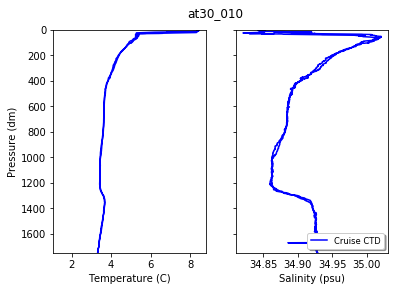

In [7]:
# Now let's plot the Cruise CTD data
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(CTD_data.Temperature,CTD_data.Pressure,'b')
ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (dm)')
ax1.invert_yaxis()
ax1.set_ylim(1750,0)

ax2.plot(CTD_data.Salinity,CTD_data.Pressure,'b',label='Cruise CTD')
ax2.set_xlabel('Salinity (psu)')

fig.suptitle(CTD_cast_name)
fig.subplots_adjust(top=0.9)

legend = ax2.legend(loc='lower right', shadow=True, fontsize='small');

In [7]:
# From the DATA TEAM notebooks
# We will use a package that was written to work with Sea-Bird *.cnv files called seabird. The function to open the 
# *.cnv file is fCNV(<file>). Per the author: 'this is not an official package, so if you have trouble with it, 
# do not complain to Sea-Bird.'
# https://github.com/castelao/seabird

f = '/Users/Sheri/Oceanography/OOI/GitHub/ohw2018_Data_Validation/data/AT30_cruise/at30_010.cnv' # change this filepath
ctddata = fCNV(f)
ctddata.attributes # list the attributes from the file

DEBUG:root:Openning file: /Users/Sheri/Oceanography/OOI/GitHub/ohw2018_Data_Validation/data/AT30_cruise/at30_010.cnv


{'sbe_model': '9',
 'LATITUDE': 59.761833333333335,
 'LONGITUDE': -39.88066666666667,
 'gps_datetime': 'Aug 19 2015  21:15:33',
 'seasave': 'V 7.21f',
 'instrument_type': 'CTD',
 'nquan': '36',
 'nvalues': '5374',
 'start_time': 'Aug 19 2015 21:15:33 [NMEA time, header]',
 'bad_flag': '-9.990e-29',
 'file_type': 'ascii',
 'md5': '17c273ec7cc23566961e1d000fb37549',
 'datetime': datetime.datetime(2015, 8, 19, 21, 15, 33),
 'filename': 'at30_010.cnv'}

In [8]:
ctddata.keys() # list the variables in the .cnv file

['timeS',
 'LONGITUDE',
 'LATITUDE',
 'DEPTH',
 'PRES',
 'TEMP',
 'TEMP2',
 'CNDC',
 'CNDC2',
 'CStarTr0',
 'flECO-AFL',
 'oxigenvoltage',
 'altM',
 'nbf',
 'density',
 'density',
 'PSAL',
 'PSAL2',
 'soundspeed',
 'svCM1',
 'timeS',
 'oxigen_ml_L',
 'sbeox0PS',
 'descentrate',
 'T2-T190C',
 'DEPTH',
 'density',
 'density',
 'PSAL',
 'PSAL2',
 'soundspeed',
 'svCM1',
 'oxigen_ml_L',
 'descentrate',
 'T2-T190C',
 'flag']

In [9]:
# Select the data from the shipboard CTD file that you would like to plot. In this example, we will select pressure
# and temperature to create a profile plot.

ctd_cast_pres = ctddata['PRES'].data
ctd_cast_temp = ctddata['TEMP'].data
ctd_cast_sal = ctddata['PSAL'].data

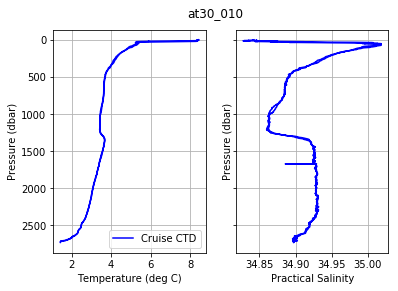

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(ctd_cast_temp, ctd_cast_pres, 'b', label='Cruise CTD')
ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Temperature (deg C)')
ax1.invert_yaxis()
ax1.grid()
ax1.legend(loc='best')

ax2.plot(ctd_cast_sal, ctd_cast_pres, 'b')
ax2.set_ylabel('Pressure (dbar)')
ax2.set_xlabel('Practical Salinity')
ax2.grid()

# fig.suptitle('{} vs. Shipboard CTD'.format(refdes), fontsize=10)
fig.suptitle(CTD_cast_name)
fig.subplots_adjust(top=0.9)
plt.show()

# Water Sampling Data

In [22]:
# Change this location for different CTD Cast water sample data
ws_file_1 = '/Users/Sheri/Oceanography/OOI/GitHub/ohw2018_Data_Validation/data/AT30_cruise/at30_010_sample_data.csv' # change this filepath

ws_data = pd.read_csv(ws_file_1, usecols=['Pressure', 'Salinity'])
ws_data.head()

,Pressure,Salinity
0,2729.3,34.8977
1,2438.1,34.9284
2,2131.0,34.9315
3,1825.3,34.9307
4,1520.1,34.9311


# Overplot datasets

In [30]:
ws_pres = ws_data.Pressure
ws_sal = ws_data.Salinity

ws_sal.head()

0    34.8977
1    34.9284
2    34.9315
3    34.9307
4    34.9311
Name: Salinity, dtype: float64

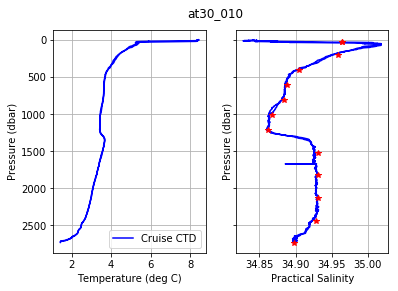

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(ctd_cast_temp, ctd_cast_pres, 'b', label='Cruise CTD')
ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Temperature (deg C)')
ax1.invert_yaxis()
ax1.grid()
ax1.legend(loc='best')

ax2.plot(ctd_cast_sal, ctd_cast_pres, 'b')
ax2.plot(ws_sal, ws_pres, 'r*')
ax2.set_ylabel('Pressure (dbar)')
ax2.set_xlabel('Practical Salinity')
ax2.grid()

# fig.suptitle('{} vs. Shipboard CTD'.format(refdes), fontsize=10)
fig.suptitle(CTD_cast_name)
fig.subplots_adjust(top=0.9)
plt.show()